------  Parlez !!!  ------
------  STOP !!!  ------
Lecture de l'enregistrement...


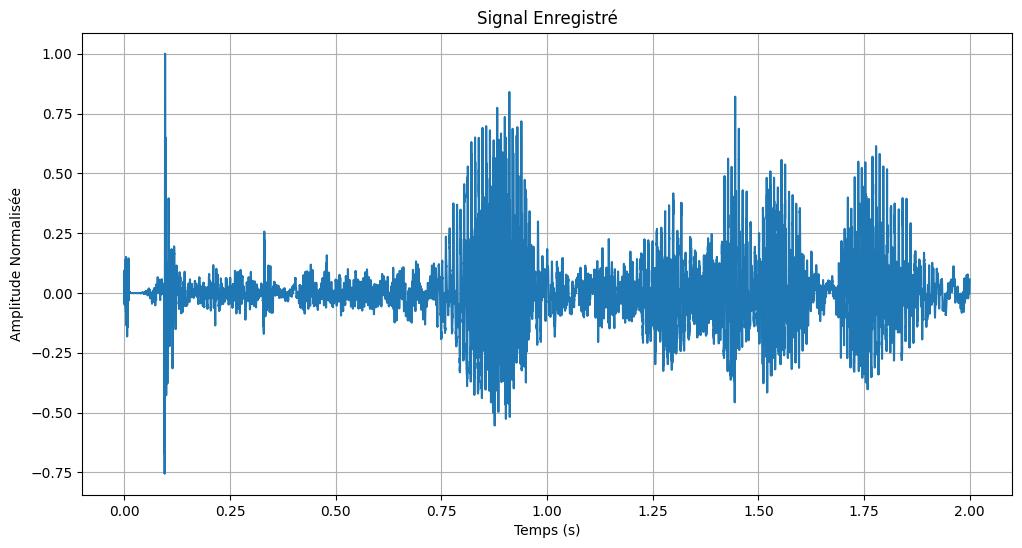

Nom de fichier invalide. Tentative de sauvegarde annulée.


In [ ]:
import numpy as np
import msicpe.ssl as ssl
import soundfile as sf
import scipy.io as io

Fe = 96000      #fréquence d'échantillonnage
Fp = 9000       #fréquence de modulation
Fc = 3000       #fréquence de coupure pour les filtres passe-bas
T  = 2

nom_fichier = None


while nom_fichier ==None:
    nom_fichier, s, t = ssl.RecordModulation(Fe, T)

sf.write('nom_fichier.wav', np.int16(s), Fe)

def modulation(s,t):
    s_module = s*np.cos(2*np.pi*Fp*t)
    return s_module

def f_passebas(S):
    Sf = ssl.PasseBas(S,Fe,Fc)
    return Sf


In [ ]:
Sf = f_passebas(s)
Sm = modulation(Sf, t)

In [27]:
import pandas as pd
import plotly.express as px
# transformée de Fourrier 

Stf , f = ssl.TransFourier(Sm,t)

df = pd.DataFrame({'fréquence'  : f, 'signal' : Stf})
figure = px.line(data_frame = df, x = 'fréquence', y = 'signal')
figure.update_layout(xaxis_title = 'fréquence(Hz)', yaxis_title = 'TranFourier du signal modulé')
figure.show()


TypeError: Object of type complex is not JSON serializable

In [ ]:
#envoi du signal

dic = {'signal' : Sm, 'label' : 'signal_fp_9kHZ'}
io.savemat('signal_fp_9kHz.mat', dic)